# Problema de extração e análise de dados - Parte 2

# 1 - Definindo o problema de negócio

### Obter dados dos xxxxx na página web https://www.agrolink.com.br/cotacoes/graos/milho e fazer uma análise de dados

# 2 - Decisões

### O problema de negócio já informa que é requerido um webscrapping. Utilizaremos o pacote BeautifulSoup para fazer a extração dos dados. Após a limpeza dos dados, faremos gráficos e estatísticas utilizando pacotes básicos do python.

# 3 - Versão python e import dos pacotes utilizados

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.4


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sqlalchemy import create_engine, text
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Danilo Temerloglou de Abreu" --iversions

Author: Danilo Temerloglou de Abreu

seaborn   : 0.13.2
pandas    : 2.2.2
matplotlib: 3.8.4
numpy     : 1.26.4
sqlite3   : 2.6.0



# 4 - Carregando banco de dados e inserindo as informações num dataframe

In [5]:
#Função para carregar banco de dados e colocar os dados num dataframe
def load_from_db(db_name='database_agro.db'):
    # Conectar ao banco de dados
    with sqlite3.connect(db_name) as conn:
        # Ler a tabela como um DataFrame
        df = pd.read_sql('SELECT * FROM database_agro', conn)
        print("Dados carregados do banco de dados com sucesso.")
    return df

# 5 - Dicionário de dados

In [6]:
#data - data da informação 
#produto - produto do agro
#municipio - município
#tipo - tipo do produto 
#peso - peso em kg
#preco - preço em R$

# 6 - Pré processamento dos dados

In [7]:
df = load_from_db()
df.sample(5)

Dados carregados do banco de dados com sucesso.


,data,produto,municipio,tipo,peso,preco
3137,07/01/2015,Abacate,SALVADOR,Médio,sc 25 Kg,"R$ 45,00"
713,15/01/2015,Abacate,SALVADOR,(comum),cx 30 kg,"R$ 108,00"
705,05/01/2015,Abacate,SALVADOR,Médio,sc 25 Kg,"R$ 45,00"
797,07/01/2015,Abacate,SALVADOR,Médio,sc 25 Kg,"R$ 45,00"
2069,23/01/2015,Abacate,SALVADOR,(comum),cx 30 kg,"R$ 108,00"


In [8]:
df.dtypes

data         object
produto      object
municipio    object
tipo         object
peso         object
preco        object
dtype: object

In [9]:
# Converter a coluna 'data' para o tipo datetime com o formato dd/mm/yyyy
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
# Garantir que a coluna 'peso' seja do tipo string
df['peso'] = df['peso'].astype(str)
# Usar uma expressão regular para extrair apenas os números da coluna 'peso'
df['peso'] = df['peso'].str.extract(r'(\d+)').astype(float)
# Arredondar para duas casas decimais
df['peso'] = df['peso'].round(2)

In [10]:
# Função para limpar e converter os valores de preço
def converter_preco(preco):
    if isinstance(preco, str):
        # Remover o símbolo 'R$' e espaços
        preco = preco.replace('R$', '').replace(' ', '')
        # Trocar a vírgula por ponto e remover pontos de milhares
        preco = preco.replace('.', '').replace(',', '.')
        try:
            # Converter para float
            return float(preco)
        except ValueError:
            # Retornar NaN se não for possível converter
            return float('nan')
    return preco

In [11]:
# Aplicar a função à coluna 'preço'
df['preco'] = df['preco'].apply(converter_preco)
# Arredondar para duas casas decimais
df['preco'] = df['preco'].round(2)

# 9 - EDA

### Valores Únicos de cada coluna

In [12]:
# Obter valores únicos da coluna 'categoria'
df['produto'].unique()

array(['Abacate'], dtype=object)

In [13]:
# Obter valores únicos da coluna 'categoria'
df['municipio'].unique()

array(['SALVADOR'], dtype=object)

In [14]:
# Obter valores únicos da coluna 'categoria'
df['tipo'].unique()

array(['(comum)', 'Médio'], dtype=object)

In [15]:
# Obter a data mais antiga
df['data'].min()

Timestamp('2015-01-05 00:00:00')

In [16]:
# Obter a data mais recente
df['data'].max()

Timestamp('2015-01-23 00:00:00')

In [17]:
df.shape

(4500, 6)

### Exploração das variáveis categóricas

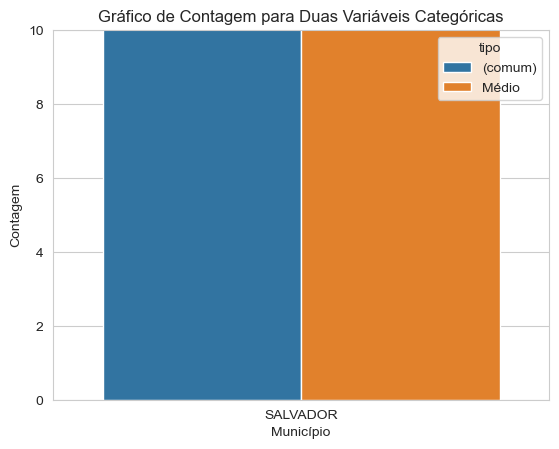

In [18]:
# Criar gráfico de contagem
sns.countplot(data=df, x='municipio', hue='tipo')
plt.xlabel('Município')
plt.ylabel('Contagem')
plt.title('Gráfico de Contagem para Duas Variáveis Categóricas')
# Definir limites do eixo y
plt.ylim(0, 10)  # Define o limite inferior e superior do eixo y
plt.show()

In [19]:
#Só há feijão tipo Mulato no município de Irece

### Exploração das variáveis numéricas

In [20]:
df.describe()

,data,peso,preco
count,4500,4500.000000,4500.000000
mean,2015-01-14 00:00:00,27.500000,76.500000
min,2015-01-05 00:00:00,25.000000,45.000000
25%,2015-01-08 00:00:00,25.000000,45.000000
50%,2015-01-14 00:00:00,27.500000,76.500000
75%,2015-01-20 00:00:00,30.000000,108.000000
max,2015-01-23 00:00:00,30.000000,108.000000
std,NaN,2.500278,31.503501


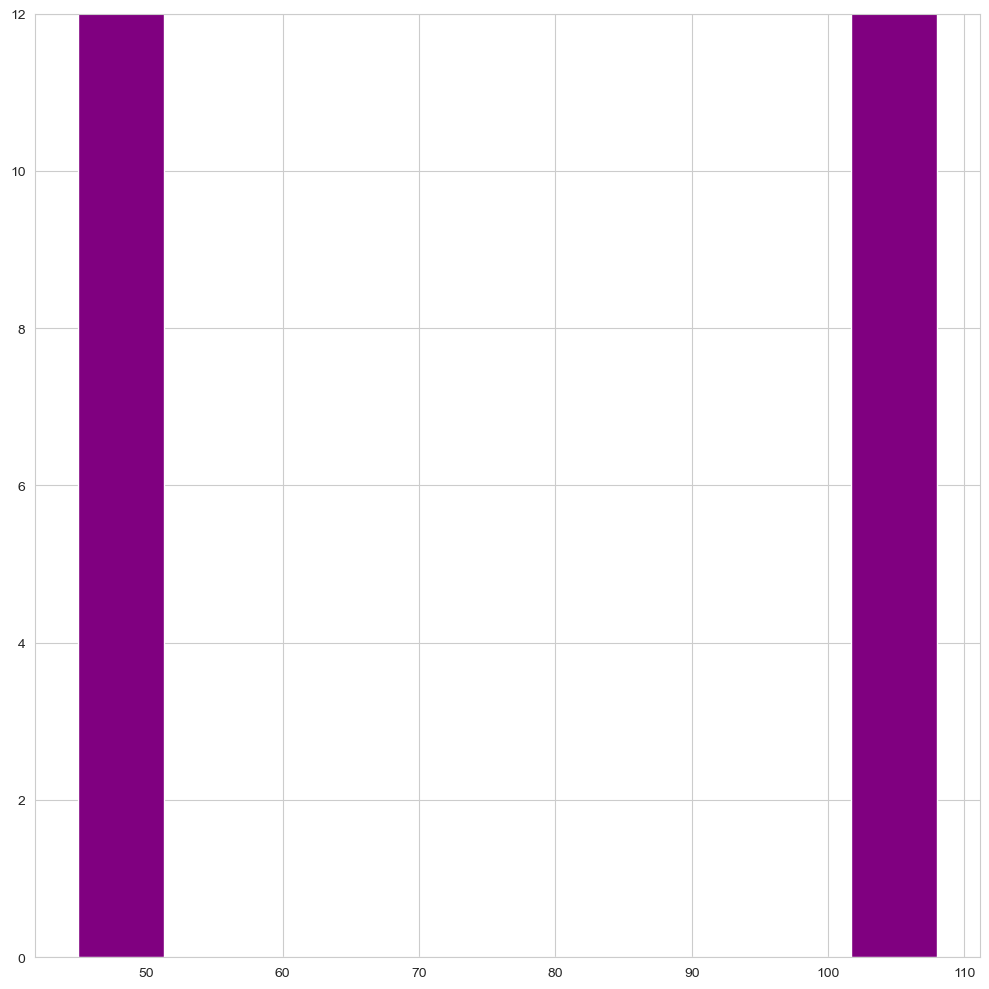

In [21]:
# Plotagem dos histogramas com cores personalizadas
plt.figure(figsize=(15, 15))  # Define o tamanho da figura
df['preco'].hist(figsize=(10, 10), bins=10, color='purple', edgecolor='white')  # Cria os histogramas com cores personalizadas
# Ajustes adicionais
# Definir limites do eixo y
plt.ylim(0, 12)  # Define o limite inferior e superior do eixo y
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de gráficos
plt.show()  # Mostra os histogramas

# 10 - Modelagem de machine learning

# 11 - Deploy do modelo de machine learning

## CONTINUAR A PARTIR DAQUI

In [ ]:
df5.columns


In [ ]:
df6 = df5.copy()

In [ ]:
# para fazermos a filtragem somente daqueles personagens que temos todos os dados, faremos uma filtragem
# Filtrando os valores das colunas
for column in df6.columns:
    df6 = df6[~df6[column].astype(str).str.contains('desconhecido')]

In [ ]:
df6.sample(5)

In [ ]:
df6['Ano_de_nascimento'].sample(5)

In [ ]:
# Verificando se há algum valor 'desconhecido'
tem_desconhecido = df6.applymap(lambda x: 'desconhecido' in str(x)).any().any()
tem_desconhecido

In [ ]:
# agora na coluna Altura vamos tirar o 'm' e na coluna Peso vamos tirar o 'k' ou 'kg'
df6['Altura'] = df6['Altura'].str.replace('m', '')
df6['Peso'] = df6['Peso'].str.replace('k', '')
df6['Peso'] = df6['Peso'].str.replace('kg', '')
df6['Peso'] = df6['Peso'].str.replace('g', '')

In [ ]:
df6.shape

In [ ]:
df6['Altura'].unique()

In [ ]:
df6['Peso'].unique()

In [ ]:
# O python reconhece o . como separador de números. Vamos ajustar as colunas Altura e Peso
df6['Altura'] = df6['Altura'].str.replace(',', '.').astype(float)
df6['Peso'] = df6['Peso'].str.replace(',', '.').astype(float)

In [ ]:
# vamos converter o tipo da coluna ano
df6['Ano_de_nascimento'] = pd.to_datetime(df6['Ano_de_nascimento'], format='%Y')

In [ ]:
df6.info()

### Exploração das variáveis numéricas

In [ ]:
df6.describe()

In [ ]:
# Plot 
df6.hist(figsize = (15,15), bins = 10) 
plt.show()

In [ ]:
# Plotagem dos histogramas com cores personalizadas
plt.figure(figsize=(15, 15))  # Define o tamanho da figura
df6.hist(figsize=(15, 15), bins=8, color='saddlebrown', edgecolor='white')  # Cria os histogramas com cores personalizadas
# Ajustes adicionais
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de gráficos
plt.show()  # Mostra os histogramas

In [ ]:
# Insighs:
# maioria nasceu entre os anos 1960 e 1970
# maioria com altura acima de 1,75m 
# maioria com peso entre 60 e 90kg

In [ ]:
# Plotagem do gráfico
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)

plt.scatter(df6['Altura'], df6['Peso'], color='blue', marker='o', alpha=0.5)  # Cria o gráfico de dispersão
plt.title('Relação entre Peso e Altura')  # Adiciona o título do gráfico
plt.xlabel('Altura (cm)')  # Adiciona o rótulo do eixo x
plt.ylabel('Peso (kg)')  # Adiciona o rótulo do eixo y
plt.grid(True)  # Adiciona grades de fundo (opcional)

plt.show()  # Mostra o gráfico

In [ ]:
# Em geral, quanto maior a altura, maior o peso do personagem.

In [ ]:
# Correlação (tabela)
df6.corr()

In [ ]:
# Existe uma alta correlação positiva entre Altura e Peso conforme já havíamos visto no gráfico.

### Exploração das variáveis categóricas

In [ ]:
# Contando as categorias
contagem = df6['Tipo_sanguíneo'].value_counts()

# Exibindo a contagem
contagem

In [ ]:
quantidade_de_tipo_sangue = df6['Tipo_sanguíneo'].nunique()
print("Quantidade de tipos sanguíneos:", quantidade_de_tipo_sangue)

In [ ]:
# Plotagem do gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)

contagem.plot(kind='bar', color='darkviolet')  # Cria o gráfico de barras
plt.title('Contagem de Tipos Sanguíneos')  # Adiciona o título do gráfico
plt.xlabel('Tipo Sanguíneo')  # Adiciona o rótulo do eixo x
plt.ylabel('Contagem')  # Adiciona o rótulo do eixo y

plt.show()  # Mostra o gráfico

In [ ]:
# mostrando de forma ordenada
ax = sns.countplot(data=df6, x='Tipo_sanguíneo', order=df6['Tipo_sanguíneo'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Contagem de Tipos Sanguíneos')
plt.show()

In [ ]:
# maioria dos personagens tem sangue A ou O

In [ ]:
# Contando as categorias
contagem = df6['Aparicoes'].value_counts()

# Exibindo a contagem
contagem

In [ ]:
quantidade_de_aparicoes = df6['Aparicoes'].nunique()
print("Quantidade de aparições:", quantidade_de_aparicoes)

In [ ]:
# Plotagem do gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)

contagem.plot(kind='bar', color='gold')  # Cria o gráfico de barras
plt.title('Contagem de Aparições')  # Adiciona o título do gráfico
plt.show()  # Mostra o gráfico

In [ ]:
# os personagens são mencionados de forma diferente títulos das séries

### Verificando a variável Ano_de_nascimento

In [ ]:
# verificando valores únicos
print(df6['Ano_de_nascimento'].unique())

In [ ]:
df6['Ano_de_nascimento'] = pd.to_datetime(df6['Ano_de_nascimento']).dt.year

In [ ]:
# Contando a frequência de cada ano
contagem_anos = df6['Ano_de_nascimento'].value_counts()
contagem_anos

In [ ]:
# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura (opcional)
contagem_anos.plot(kind='bar', color='darkkhaki')  # Cria o gráfico de barras
plt.title('Contagem de personagens nascidos por Ano')  # Adiciona o título do gráfico
#plt.xlabel('Ano')  # Adiciona o rótulo do eixo x
#plt.ylabel('Contagem')  # Adiciona o rótulo do eixo y
plt.show()  # Mostra o gráfico

In [ ]:
# O ano que teve mais nascimentos dos personagens foi em 1972.

# Fim